# **Visualização para Exploração de Dados**

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Conjunto de Dados com Estatísticas do Brasil**

In [3]:
data = pd.read_csv('BRAZIL_CITIES.csv',sep=";", decimal=".",)
data.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL.MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


In [4]:
data['LONG']

0      -49.440548
1      -47.396832
2      -48.718812
3      -45.446191
4      -48.884404
          ...    
5568   -42.725508
5569   -37.093552
5570   -50.055740
5571   -45.657698
5572   -51.549566
Name: LONG, Length: 5573, dtype: float64

In [ ]:
data.shape

(5573, 81)

In [5]:
data.UBER = data.UBER.replace(np.nan,0)
data.POST_OFFICES = data.POST_OFFICES.replace(np.nan,1)
data.CAPITAL = data.CAPITAL.replace(0,'NO')
data.CAPITAL = data.CAPITAL.replace(1,'YES')

In [6]:
data.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL.MART,POST_OFFICES
0,Abadia De Goiás,GO,NO,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,0.0,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,NO,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,0.0,NaN,NaN,1.0
2,Abadiânia,GO,NO,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,0.0,NaN,NaN,3.0
3,Abaeté,MG,NO,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,0.0,NaN,NaN,4.0
4,Abaetetuba,PA,NO,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,0.0,NaN,NaN,2.0


In [7]:
data['TAXES']

0       20554.20
1       12873.50
2       26822.58
3       26994.09
4       95180.48
          ...   
5568    13330.49
5569      635.10
5570     1988.33
5571    22610.35
5572     3014.65
Name: TAXES, Length: 5573, dtype: float64

In [ ]:
original_data = data.copy(True)

In [8]:
# Pega colunas específicas
columns = ['CITY', 'STATE', 'CAPITAL', 'MUN_EXPENDIT', 'IBGE_RES_POP','AREA',
           'IDHM','LONG','LAT','ALT','ESTIMATED_POP','TAXES','GDP','GDP_CAPITA','COMP_TOT',
           'Cars','Motorcycles','UBER','Wheeled_tractor','POST_OFFICES','IBGE_PLANTED_AREA','RURAL_URBAN']
df = data[columns]
df.head()

,CITY,STATE,CAPITAL,MUN_EXPENDIT,IBGE_RES_POP,AREA,IDHM,LONG,LAT,ALT,...,GDP,GDP_CAPITA,COMP_TOT,Cars,Motorcycles,UBER,Wheeled_tractor,POST_OFFICES,IBGE_PLANTED_AREA,RURAL_URBAN
0,Abadia De Goiás,GO,NO,28227691.0,6876.0,147.26,0.708,-49.440548,-16.758812,893.60,...,166.41,20664.57,284.0,2158.0,1246.0,0.0,0.0,1.0,319.0,Urbano
1,Abadia Dos Dourados,MG,NO,17909274.0,6704.0,881.06,0.690,-47.396832,-18.487565,753.12,...,180.09,25591.70,476.0,2227.0,1142.0,0.0,0.0,1.0,4479.0,Rural Adjacente
2,Abadiânia,GO,NO,37513019.0,15757.0,1045.13,0.690,-48.718812,-16.182672,1017.55,...,287984.49,15628.40,288.0,2838.0,1426.0,0.0,0.0,3.0,10307.0,Rural Adjacente
3,Abaeté,MG,NO,NaN,22690.0,1817.07,0.698,-45.446191,-19.155848,644.74,...,430235.36,18250.42,621.0,6928.0,2953.0,0.0,0.0,4.0,1862.0,Urbano
4,Abaetetuba,PA,NO,NaN,141100.0,1610.65,0.628,-48.884404,-1.723470,10.12,...,1249255.29,8222.36,931.0,5277.0,25661.0,0.0,0.0,2.0,25200.0,Urbano


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5573 non-null   object 
 1   STATE              5573 non-null   object 
 2   CAPITAL            5573 non-null   object 
 3   MUN_EXPENDIT       4081 non-null   float64
 4   IBGE_RES_POP       5565 non-null   float64
 5   AREA               5570 non-null   float64
 6   IDHM               5565 non-null   float64
 7   LONG               5564 non-null   float64
 8   LAT                5564 non-null   float64
 9   ALT                5564 non-null   float64
 10  ESTIMATED_POP      5570 non-null   float64
 11  TAXES              5570 non-null   float64
 12  GDP                5570 non-null   float64
 13  GDP_CAPITA         5570 non-null   float64
 14  COMP_TOT           5570 non-null   float64
 15  Cars               5562 non-null   float64
 16  Motorcycles        5562 

In [10]:
df['RURAL_URBAN']

0                        Urbano
1               Rural Adjacente
2               Rural Adjacente
3                        Urbano
4                        Urbano
                 ...           
5568                     Urbano
5569            Rural Adjacente
5570            Rural Adjacente
5571                     Urbano
5572    Intermediário Adjacente
Name: RURAL_URBAN, Length: 5573, dtype: object

In [11]:
print("Porcentagem e valores null ou NA no dataframe")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Porcentagem e valores null ou NA no dataframe


CITY                  0.00
STATE                 0.00
CAPITAL               0.00
MUN_EXPENDIT         26.77
IBGE_RES_POP          0.14
AREA                  0.05
IDHM                  0.14
LONG                  0.16
LAT                   0.16
ALT                   0.16
ESTIMATED_POP         0.05
TAXES                 0.05
GDP                   0.05
GDP_CAPITA            0.05
COMP_TOT              0.05
Cars                  0.20
Motorcycles           0.20
UBER                  0.00
Wheeled_tractor       0.20
POST_OFFICES          0.00
IBGE_PLANTED_AREA     0.05
RURAL_URBAN           0.05
dtype: float64

In [12]:
# Remove dados faltantes
df.dropna(how ='any', inplace = True)
print("Porcentagem e valores null ou NA no dataframe")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Porcentagem e valores null ou NA no dataframe


CITY                 0.0
STATE                0.0
CAPITAL              0.0
MUN_EXPENDIT         0.0
IBGE_RES_POP         0.0
AREA                 0.0
IDHM                 0.0
LONG                 0.0
LAT                  0.0
ALT                  0.0
ESTIMATED_POP        0.0
TAXES                0.0
GDP                  0.0
GDP_CAPITA           0.0
COMP_TOT             0.0
Cars                 0.0
Motorcycles          0.0
UBER                 0.0
Wheeled_tractor      0.0
POST_OFFICES         0.0
IBGE_PLANTED_AREA    0.0
RURAL_URBAN          0.0
dtype: float64

In [13]:
df.rename(columns={'IBGE_RES_POP': 'Population(2010)',
                    'IDHM':'Human Development Index Ranking',
                    'ESTIMATED_POP':'Estimated Population(2018)',
                    'COMP_TOT':'Total companies',
                    'UBER':'Uber',
                    'POST_OFFICES':'Post Offices'}, inplace=True)
df.head()

,CITY,STATE,CAPITAL,MUN_EXPENDIT,Population(2010),AREA,Human Development Index Ranking,LONG,LAT,ALT,...,GDP,GDP_CAPITA,Total companies,Cars,Motorcycles,Uber,Wheeled_tractor,Post Offices,IBGE_PLANTED_AREA,RURAL_URBAN
0,Abadia De Goiás,GO,NO,28227691.0,6876.0,147.26,0.708,-49.440548,-16.758812,893.60,...,166.41,20664.57,284.0,2158.0,1246.0,0.0,0.0,1.0,319.0,Urbano
1,Abadia Dos Dourados,MG,NO,17909274.0,6704.0,881.06,0.690,-47.396832,-18.487565,753.12,...,180.09,25591.70,476.0,2227.0,1142.0,0.0,0.0,1.0,4479.0,Rural Adjacente
2,Abadiânia,GO,NO,37513019.0,15757.0,1045.13,0.690,-48.718812,-16.182672,1017.55,...,287984.49,15628.40,288.0,2838.0,1426.0,0.0,0.0,3.0,10307.0,Rural Adjacente
9,Abdon Batista,SC,NO,19506956.0,2653.0,237.16,0.690,-51.025272,-27.608987,720.98,...,64742.01,24739.02,69.0,976.0,345.0,0.0,2.0,1.0,5502.0,Rural Adjacente
13,Abreu E Lima,PE,NO,119645700.0,94429.0,126.19,0.679,-34.899131,-7.904449,27.06,...,1424505.83,14390.40,841.0,14579.0,10122.0,0.0,0.0,1.0,387.0,Urbano


In [14]:
# Coluna para representar o crescimento populacional de 2010 até 2018
df= df.drop_duplicates(subset='CITY',keep='first')
df['Population Growth %']=((df['Estimated Population(2018)']-df['Population(2010)'])/(df['Population(2010)']))*100
df.head()

,CITY,STATE,CAPITAL,MUN_EXPENDIT,Population(2010),AREA,Human Development Index Ranking,LONG,LAT,ALT,...,GDP_CAPITA,Total companies,Cars,Motorcycles,Uber,Wheeled_tractor,Post Offices,IBGE_PLANTED_AREA,RURAL_URBAN,Population Growth %
0,Abadia De Goiás,GO,NO,28227691.0,6876.0,147.26,0.708,-49.440548,-16.758812,893.60,...,20664.57,284.0,2158.0,1246.0,0.0,0.0,1.0,319.0,Urbano,24.825480
1,Abadia Dos Dourados,MG,NO,17909274.0,6704.0,881.06,0.690,-47.396832,-18.487565,753.12,...,25591.70,476.0,2227.0,1142.0,0.0,0.0,1.0,4479.0,Rural Adjacente,3.997613
2,Abadiânia,GO,NO,37513019.0,15757.0,1045.13,0.690,-48.718812,-16.182672,1017.55,...,15628.40,288.0,2838.0,1426.0,0.0,0.0,3.0,10307.0,Rural Adjacente,24.478010
9,Abdon Batista,SC,NO,19506956.0,2653.0,237.16,0.690,-51.025272,-27.608987,720.98,...,24739.02,69.0,976.0,345.0,0.0,2.0,1.0,5502.0,Rural Adjacente,-2.864681
13,Abreu E Lima,PE,NO,119645700.0,94429.0,126.19,0.679,-34.899131,-7.904449,27.06,...,14390.40,841.0,14579.0,10122.0,0.0,0.0,1.0,387.0,Urbano,5.499370


<Axes: >

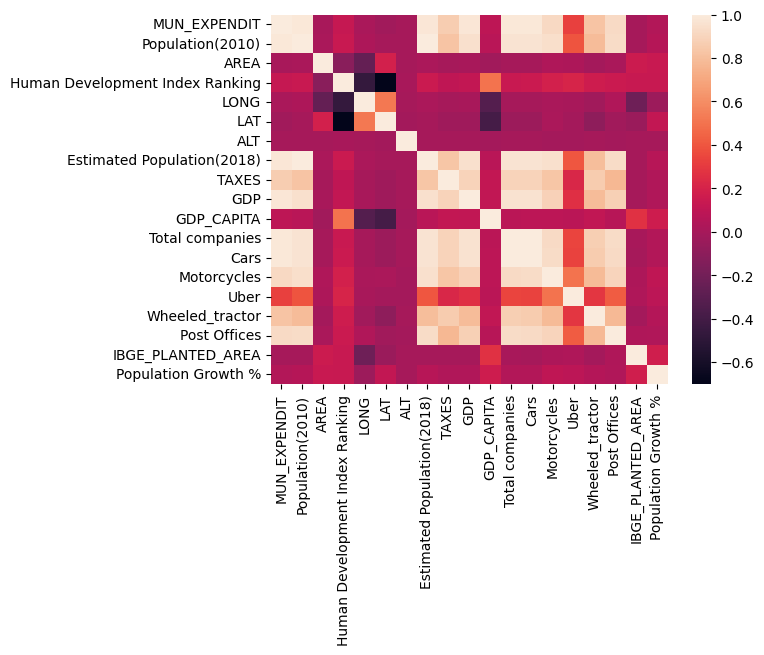

In [15]:
# Correlação entre variáveis
correlation= df.corr(numeric_only=True)
sns.heatmap(correlation)

# **Gráficos de Barras ou Colunas**

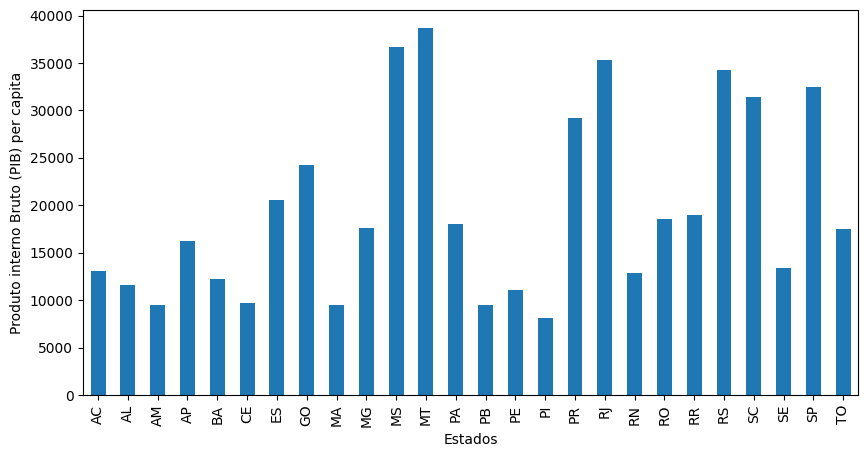

In [16]:
data = df.groupby(by=['STATE']).mean()['GDP_CAPITA']
ax = data.plot.bar(figsize=(10,5))

_ = ax.set(xlabel='Estados', ylabel='Produto interno Bruto (PIB) per capita')

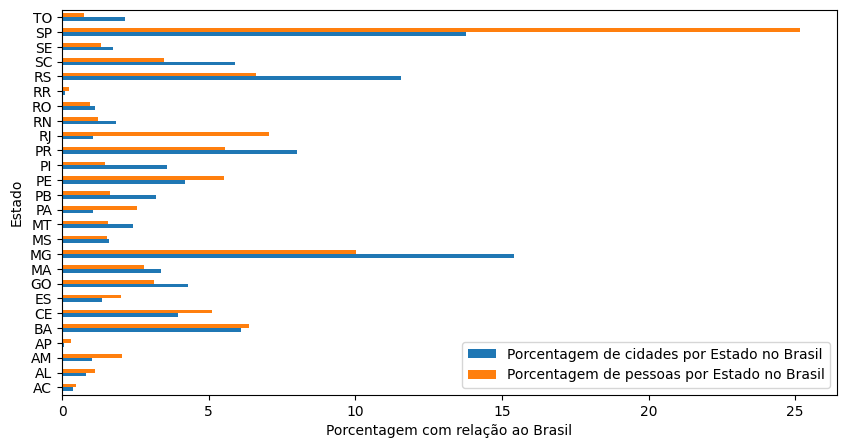

In [17]:
data = df.groupby(by=['STATE']).agg({'CITY': 'count', 'Estimated Population(2018)': 'sum'})

data['CITY'] = (data['CITY'] / data['CITY'].sum()) * 100

data['Estimated Population(2018)'] = (data['Estimated Population(2018)'] / data['Estimated Population(2018)'].sum()) * 100

ax = data.plot.barh(figsize=(10,5))

_ = ax.set(xlabel='Porcentagem com relação ao Brasil', ylabel='Estado')
_ = ax.legend(['Porcentagem de cidades por Estado no Brasil', 'Porcentagem de pessoas por Estado no Brasil'])

# **Gráfico de Setor**

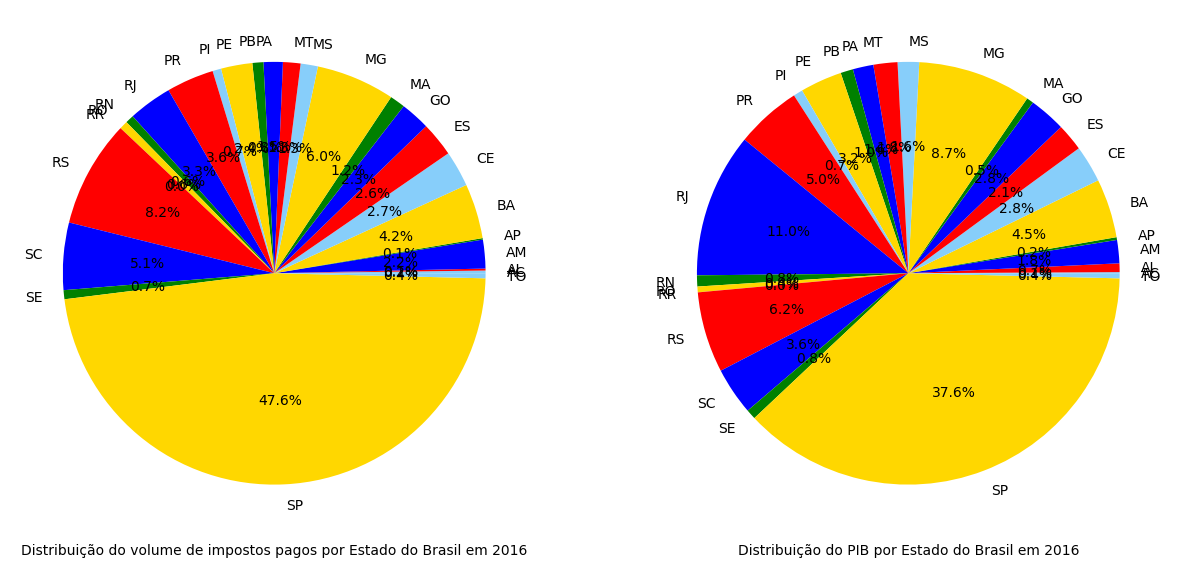

In [18]:
# Especifica a sequência de cores a ser utilizada na visualização
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

_ = df.groupby(by=['STATE']).sum()['TAXES'].plot.pie(colors=colors, autopct='%1.1f%%', ax=axes[0])
_ = df.groupby(by=['STATE']).sum()['GDP'].plot.pie(colors=colors, autopct='%1.1f%%', ax=axes[1])

_ = axes[0].set(xlabel='Distribuição do volume de impostos pagos por Estado do Brasil em 2016', ylabel='')
_ = axes[1].set(xlabel='Distribuição do PIB por Estado do Brasil em 2016', ylabel='')

# **Gráficos de Dispersão**

Text(0, 0.5, 'Gastos do município')

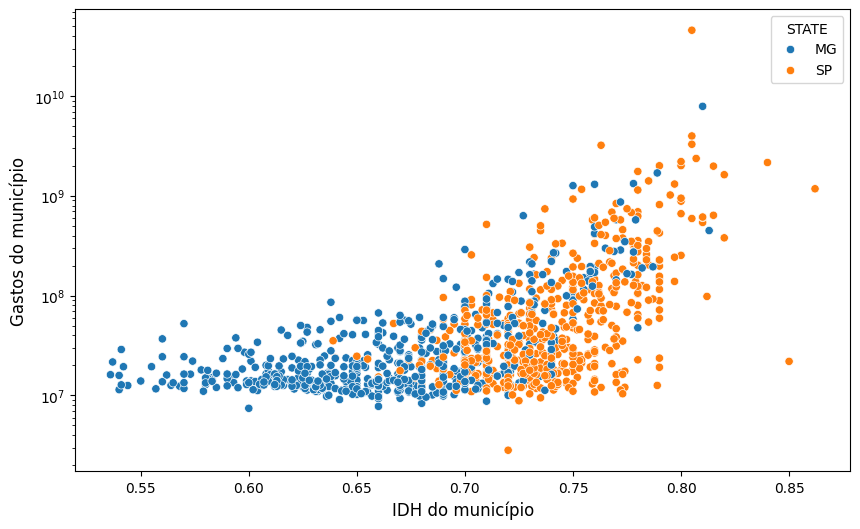

In [19]:
# O valor de despesas de alguns municípios não foi disponibilizado na base de dados
data = df.query("MUN_EXPENDIT != 0")
data = data.query('STATE == "SP" or STATE == "MG"')

f, ax = plt.subplots(figsize=(10, 6))
plt.yscale('log')

sct_plot = sns.scatterplot(x=data['Human Development Index Ranking'],
                           y=data['MUN_EXPENDIT'],
                           hue=data['STATE'])

sct_plot.set_xlabel(xlabel = 'IDH do município', fontsize = 12)
sct_plot.set_ylabel(ylabel = 'Gastos do município', fontsize = 12)

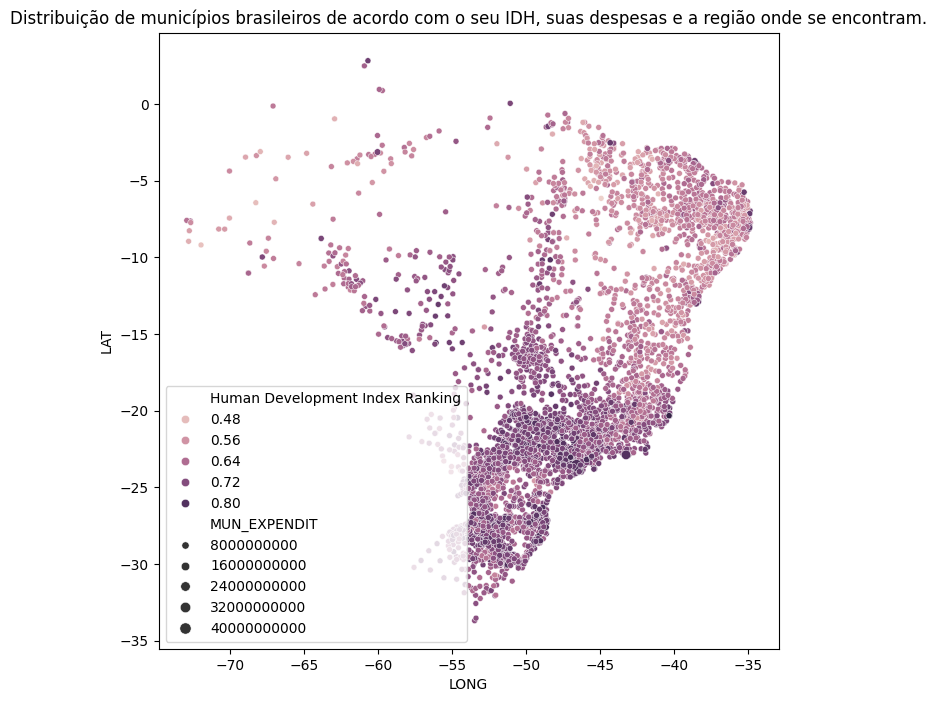

In [20]:
data = df.query("MUN_EXPENDIT != 0")
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=data.LONG,
                y=data.LAT ,
                hue=data['Human Development Index Ranking'],
                size=data['MUN_EXPENDIT'])

_ = plt.title("Distribuição de municípios brasileiros de acordo com o seu IDH, suas despesas e a região onde se encontram.")

# **Gráficos de Linha**

In [ ]:
data = df.groupby('STATE').sum()[['Population(2010)', 'Estimated Population(2018)']]

plot = data.plot.line(figsize=(15,5))
_ = plt.xticks(range(0,len(data.index)), labels=data.index, rotation=45)
_ = plot.set(xlabel='Estados', ylabel='População')

# **Gráficos de Radar**

In [ ]:
data = df.groupby(by=['STATE']).agg({'CITY': 'count',
                                       'Estimated Population(2018)': 'sum',
                                       'AREA': 'sum',
                                       'GDP': 'sum',
                                       'Total companies': 'sum',
                                       'TAXES': 'sum'})

# Colocando os valores individuais em proporção do valor total
for col in data.columns:
    data[col] = data[col] / sum(data[col])

fig = go.Figure(
    data=[go.Scatterpolar(r=data.values[0], theta=data.columns, fill='toself', name=data.index[0]),
          go.Scatterpolar(r=data.values[1], theta=data.columns, fill='toself', name=data.index[1]),
          go.Scatterpolar(r=data.values[2], theta=data.columns, fill='toself', name=data.index[2]),
          go.Scatterpolar(r=data.values[3], theta=data.columns, fill='toself', name=data.index[3]),
          go.Scatterpolar(r=data.values[4], theta=data.columns, fill='toself', name=data.index[4])],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show(renderer="colab")

# **Histogramas**

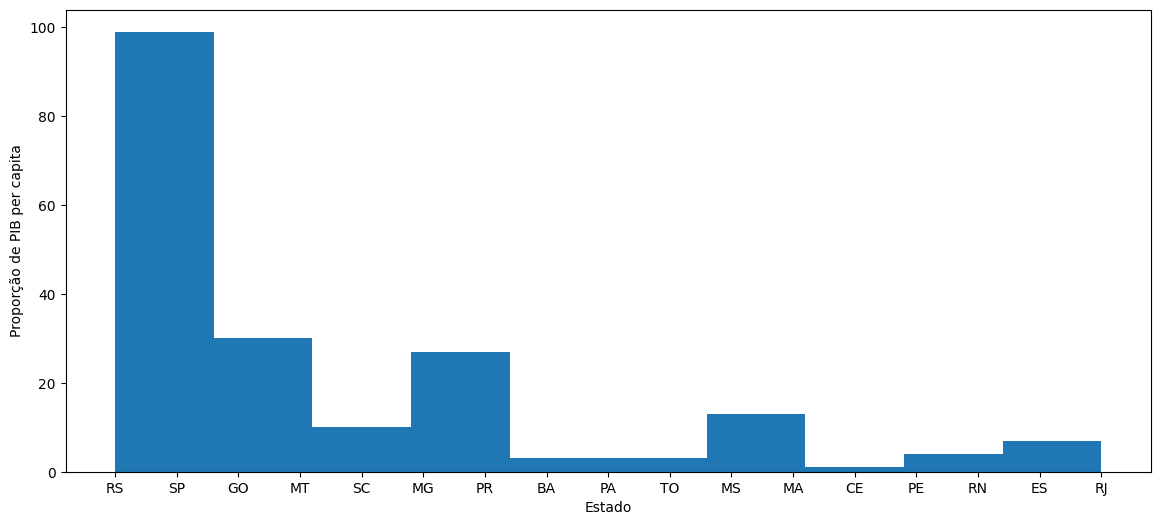

In [ ]:
f, ax = plt.subplots(figsize=(14, 6))

filtro = df['GDP_CAPITA'] > df['GDP_CAPITA'].quantile(0.95)

ax = df[filtro]['STATE'].hist(histtype='bar', grid=False)
_ = ax.set(xlabel='Estado', ylabel='Proporção de PIB per capita')

# **Gráfico de Caixa - BoxPlot**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 0 to 5572
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CITY                             3923 non-null   object 
 1   STATE                            3923 non-null   object 
 2   CAPITAL                          3923 non-null   object 
 3   MUN_EXPENDIT                     3923 non-null   float64
 4   Population(2010)                 3923 non-null   float64
 5   AREA                             3923 non-null   float64
 6   Human Development Index Ranking  3923 non-null   float64
 7   LONG                             3923 non-null   float64
 8   LAT                              3923 non-null   float64
 9   ALT                              3923 non-null   float64
 10  Estimated Population(2018)       3923 non-null   float64
 11  TAXES                            3923 non-null   float64
 12  GDP                 

Text(0.5, 0.98, '')

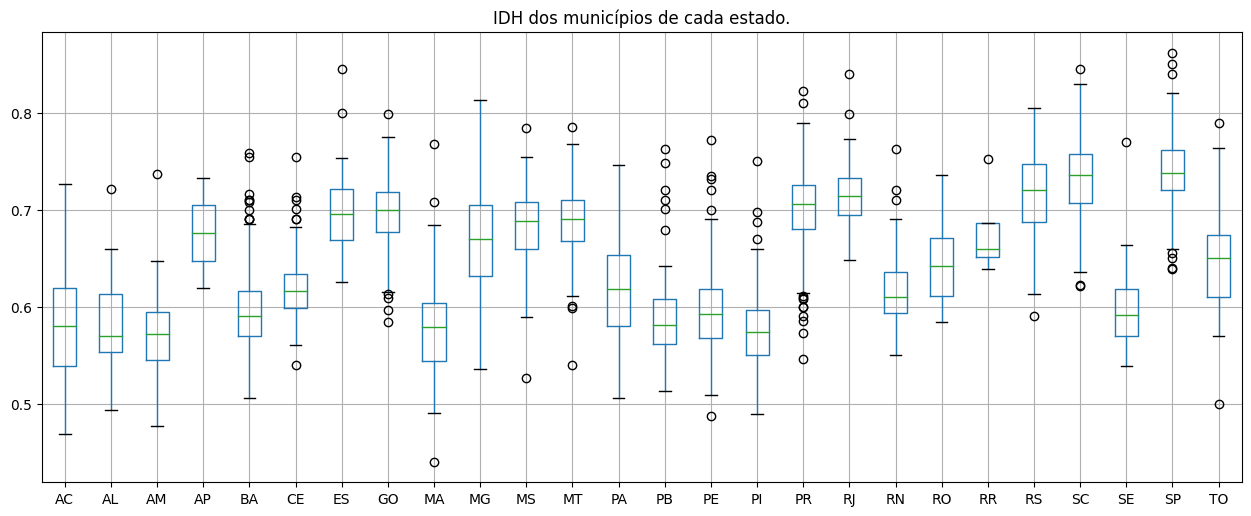

In [ ]:
ax = df.boxplot(column='Human Development Index Ranking', by='STATE', figsize=(15,6))
_ = ax.set(xlabel='', ylabel='')
plt.title('IDH dos municípios de cada estado.')
plt.suptitle('')

# **Gráficos de Violino**

Text(0.5, 1.0, 'Capital vs IDH')

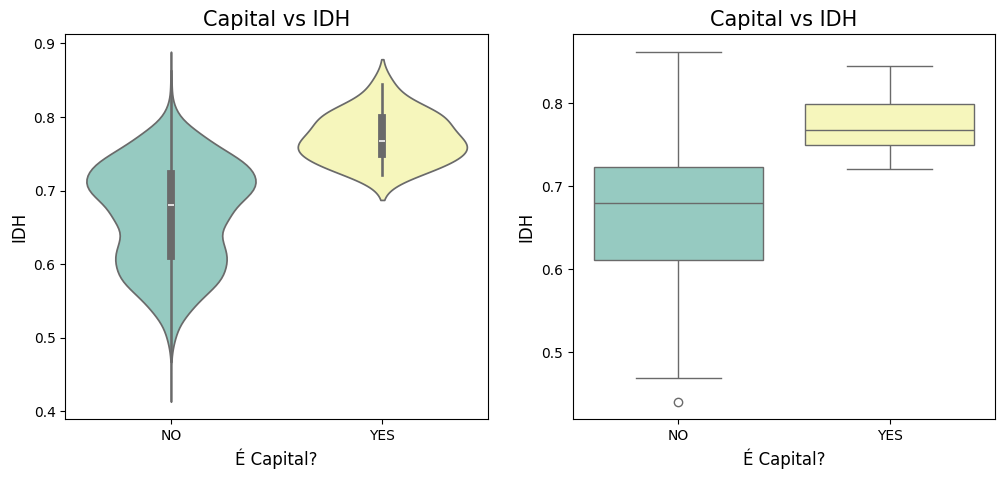

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

violin_hdi = sns.violinplot(x = 'CAPITAL', y = 'Human Development Index Ranking', data = df, palette = "Set3", ax=axes[0])
violin_hdi.set_xlabel(xlabel = 'É Capital?', fontsize = 12)
violin_hdi.set_ylabel(ylabel = 'IDH', fontsize = 12)
violin_hdi.set_title(label = 'Capital vs IDH', fontsize = 15)

box_hdi = sns.boxplot(x = 'CAPITAL', y = 'Human Development Index Ranking', data = df, palette = "Set3", ax=axes[1])
box_hdi.set_xlabel(xlabel = 'É Capital?', fontsize = 12)
box_hdi.set_ylabel(ylabel = 'IDH', fontsize = 12)
box_hdi.set_title(label = 'Capital vs IDH', fontsize = 15)

# **Nuvem de Palavras**

(-0.5, 599.5, 299.5, -0.5)

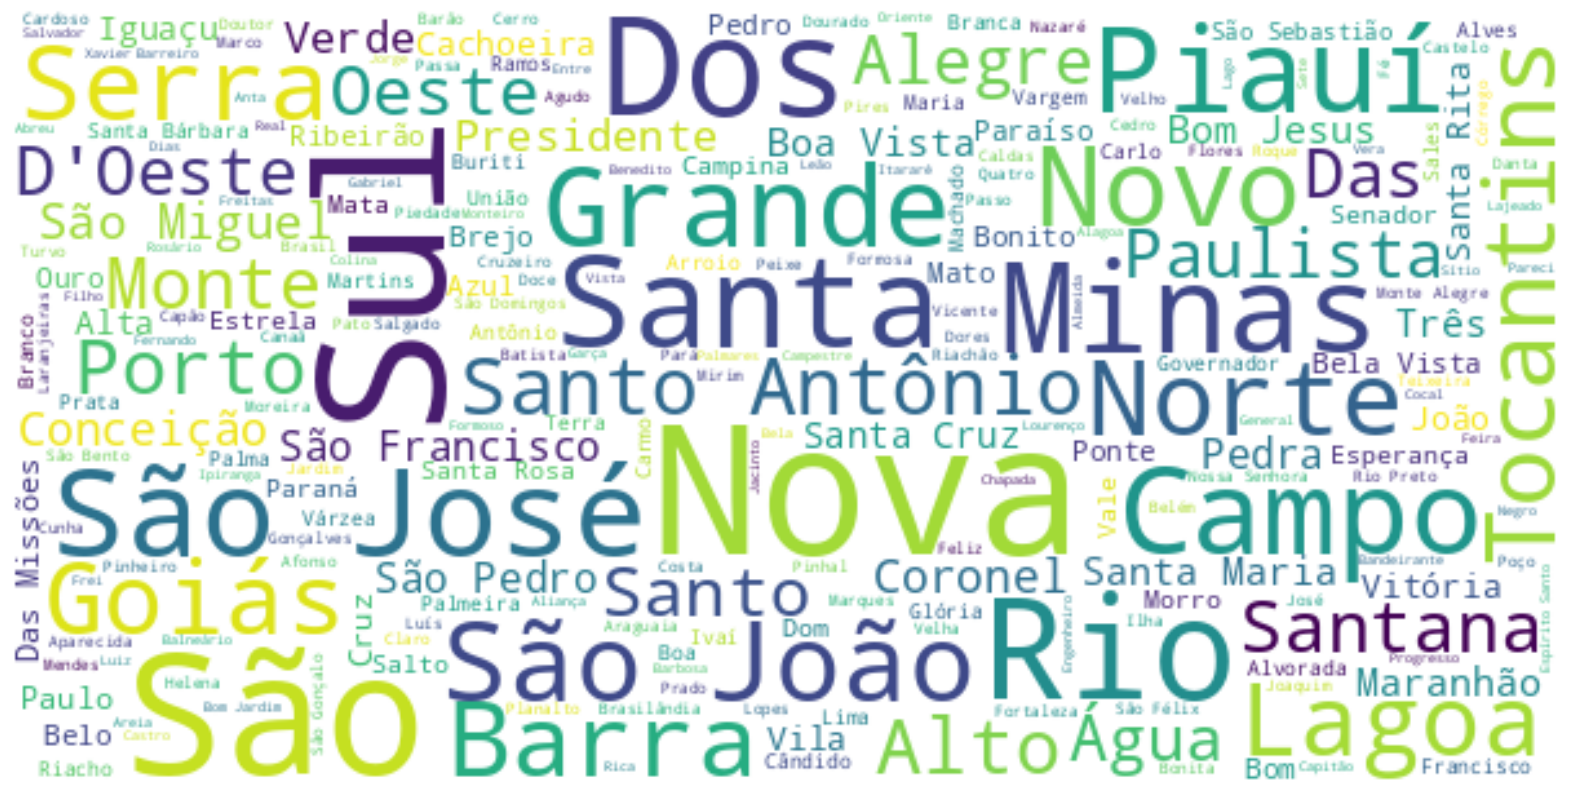

In [ ]:
text = ' '.join(df['CITY'])

# Remoção de palavras repetidas irrelevantes
stop_words = ['De', 'Do', 'Da']

# Mapeamento da frequência de cada palavra e produção da nuvem de palavras
wordcloud = WordCloud(background_color="white",
                      max_words=len(df),
                      max_font_size=70,
                      stopwords=stop_words,
                      height=300,
                      width=600).generate(text)

plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# **Mapas de Calor**

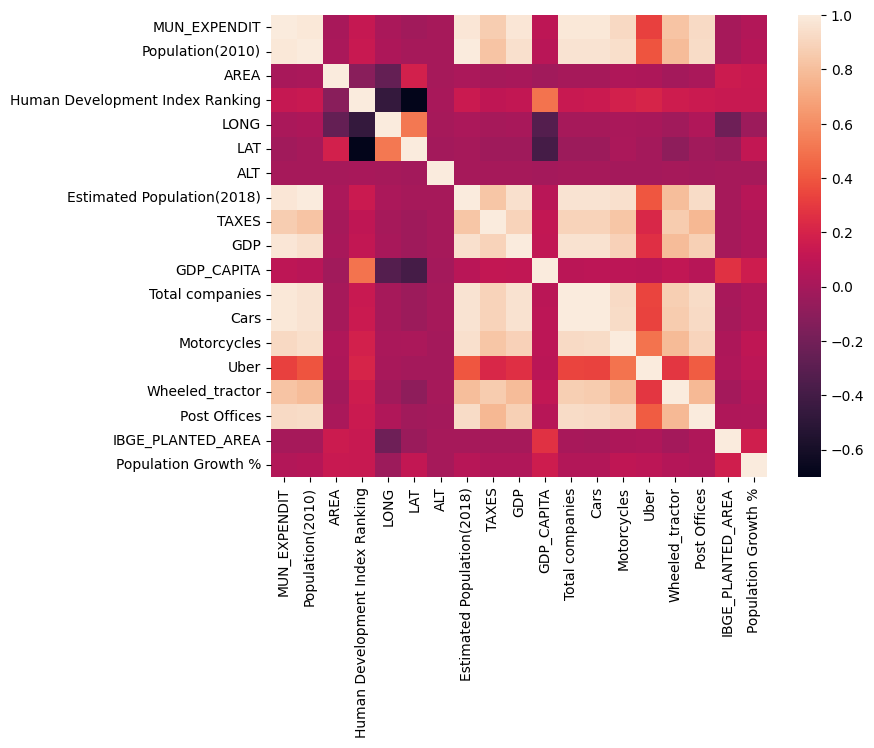

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(df.corr())

# **Será que as capitais tem maior HDI?**

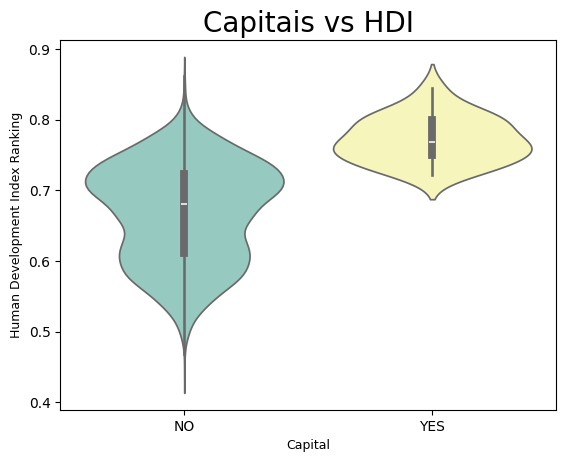

In [ ]:
capital_hdi=sns.violinplot(x = 'CAPITAL', y = 'Human Development Index Ranking', data = df, palette = "Set3")
capital_hdi.set_xlabel(xlabel = 'Capital', fontsize = 9)
capital_hdi.set_ylabel(ylabel = 'Human Development Index Ranking', fontsize = 9)
capital_hdi.set_title(label = 'Capitais vs HDI', fontsize = 20)
plt.show()

# **Distribuição do HDI**

In [ ]:
df['Human Development Index Ranking'].mean()

0.6692439459597247

Text(0.5, 1.0, 'Distribuição do HDI para todas as cidades')

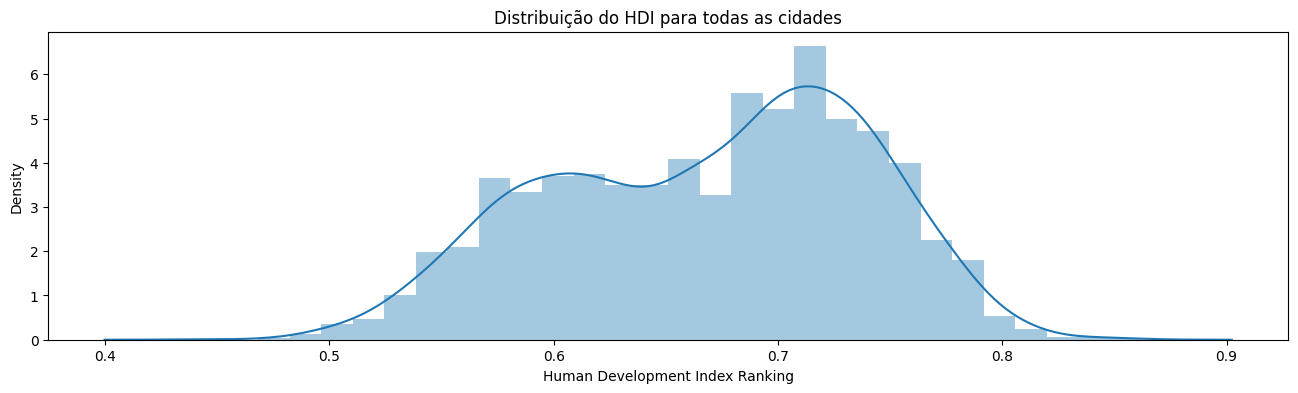

In [ ]:
fig, ax = plt.subplots(figsize=[16,4])
category_plot = sns.distplot(df['Human Development Index Ranking'],ax=ax)
ax.set_title('Distribuição do HDI para todas as cidades')

# **Área das Cidades**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5285 entries, 0 to 5572
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CITY                             5285 non-null   object 
 1   STATE                            5285 non-null   object 
 2   CAPITAL                          5285 non-null   object 
 3   Population(2010)                 5285 non-null   float64
 4   AREA                             5285 non-null   float64
 5   Human Development Index Ranking  5285 non-null   float64
 6   LONG                             5285 non-null   float64
 7   LAT                              5285 non-null   float64
 8   ALT                              5285 non-null   float64
 9   Estimated Population(2018)       5285 non-null   float64
 10  GDP                              5285 non-null   float64
 11  GDP_CAPITA                       5285 non-null   float64
 12  Total companies     

In [ ]:
df['AREA']

0        147.26
1        881.06
2       1045.13
3       1817.07
4       1610.65
         ...   
5568    5079.66
5569     109.39
5570     319.06
5571    2140.11
5572     190.18
Name: AREA, Length: 5285, dtype: float64

In [ ]:
df[df['CITY'] == 'São Paulo']

,CITY,STATE,CAPITAL,Population(2010),AREA,Human Development Index Ranking,LONG,LAT,ALT,Estimated Population(2018),GDP,GDP_CAPITA,Total companies,Cars,Motorcycles,Uber,Wheeled_tractor,Post Offices,Population Growth %
4856,São Paulo,SP,YES,11253503.0,1521.11,0.805,-46.570383,-23.567387,783.62,12176866.0,6.870359e+08,57071.43,530446.0,5740995.0,1134570.0,1.0,3236.0,225.0,8.205116


Text(0.5, 1.0, 'Cidades com a maior área')

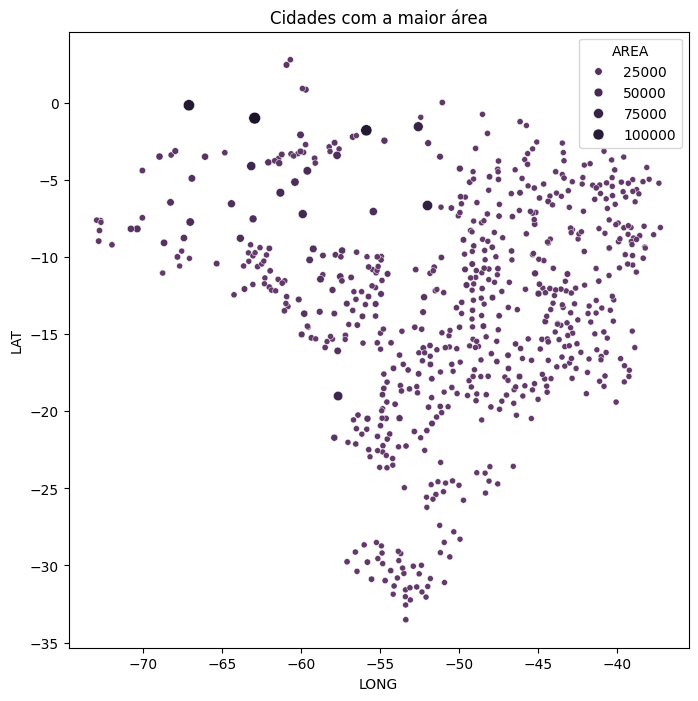

In [ ]:
cmap = sns.cubehelix_palette(dark=.1, light=.3, as_cmap=True)

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['AREA']>= 1500].LONG,
                y=df[df['AREA']>= 1500].LAT,
                palette =cmap,
                hue=df['AREA'],
                size=df['AREA'])
plt.title("Cidades com a maior área")

Text(0.5, 1.0, 'Cidades com o maior número de empresas')

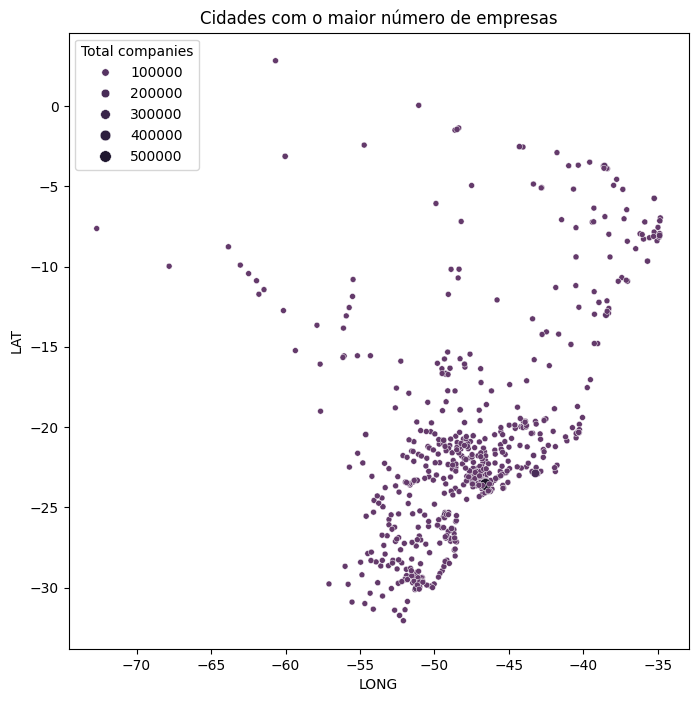

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['Total companies']>1000].LONG,
                y=df[df['Total companies']>1000].LAT,
                palette =cmap,
                hue=df['Total companies'],
                size=df['Total companies'])
plt.title("Cidades com o maior número de empresas")

Text(0.5, 1.0, 'Cidades com o maior crescimento populacional %')

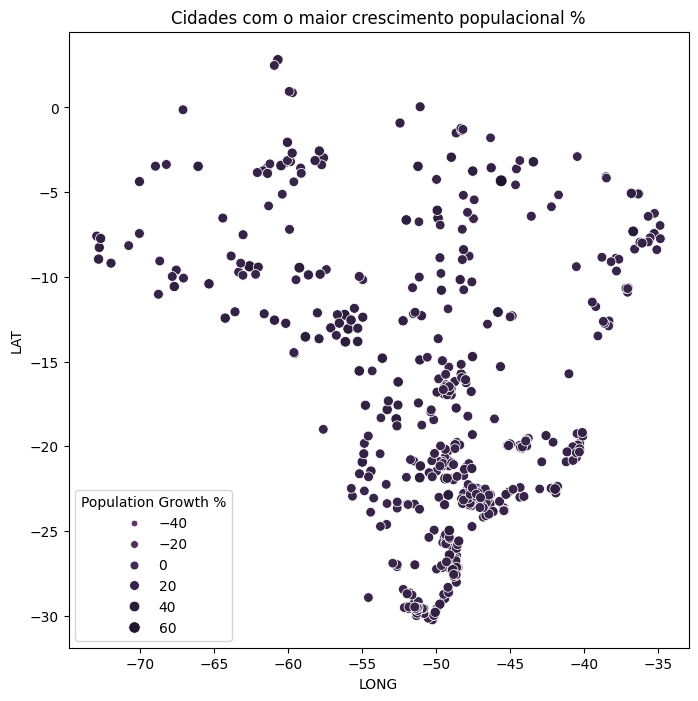

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['Population Growth %'] > 15].LONG,
                y=df[df['Population Growth %'] > 15].LAT,
                palette =cmap,
                hue=df['Population Growth %'],
                size=df['Population Growth %'])
plt.title("Cidades com o maior crescimento populacional %")

# **Cidades com o maior GDP per capita**

In [ ]:
df['GDP_CAPITA'].max()

314637.69

In [ ]:
newdf=df[['CITY','GDP_CAPITA','CAPITAL','STATE']].groupby(['GDP_CAPITA'])
newdf=newdf.filter(lambda x: x.mean() >= 80000)
newdf=newdf.sort_values(by=['GDP_CAPITA'])
newdf

,CITY,GDP_CAPITA,CAPITAL,STATE
1053,Capão Do Cipó,80672.37,NO,RS
5343,Turvelândia,81567.20,NO,GO
3341,Nova Lima,82145.16,NO,MG
4607,São Caetano Do Sul,83656.30,NO,SP
4276,Roque Gonzales,84046.58,NO,RS
...,...,...,...,...
768,Brejo Alegre,274572.12,NO,SP
5303,Triunfo,289932.05,NO,RS
4653,São Francisco Do Conde,296459.35,NO,BA
4963,Selvíria,306138.63,NO,MS


<Axes: >

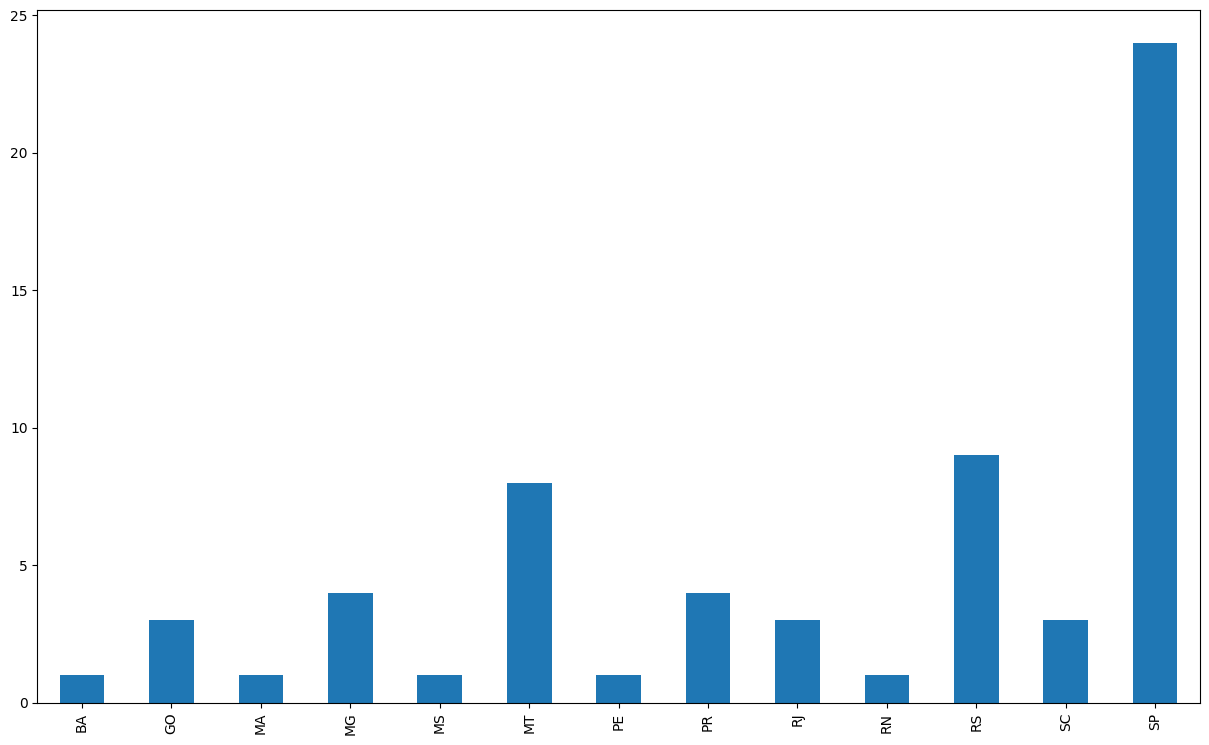

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
newdf.STATE.value_counts().sort_index().plot.bar()

# **A distribuição de carros está localizada em partes específicas do Brasil?**

In [ ]:
df['Cars distribution']=((df['Cars'])/(df['Estimated Population(2018)']))
df.head()

,CITY,STATE,CAPITAL,MUN_EXPENDIT,Population(2010),AREA,Human Development Index Ranking,LONG,LAT,ALT,...,Total companies,Cars,Motorcycles,Uber,Wheeled_tractor,Post Offices,IBGE_PLANTED_AREA,RURAL_URBAN,Population Growth %,Cars distribution
0,Abadia De Goiás,GO,NO,28227691.0,6876.0,147.26,0.708,-49.440548,-16.758812,893.60,...,284.0,2158.0,1246.0,0.0,0.0,1.0,319.0,Urbano,24.825480,0.251427
1,Abadia Dos Dourados,MG,NO,17909274.0,6704.0,881.06,0.690,-47.396832,-18.487565,753.12,...,476.0,2227.0,1142.0,0.0,0.0,1.0,4479.0,Rural Adjacente,3.997613,0.319421
2,Abadiânia,GO,NO,37513019.0,15757.0,1045.13,0.690,-48.718812,-16.182672,1017.55,...,288.0,2838.0,1426.0,0.0,0.0,3.0,10307.0,Rural Adjacente,24.478010,0.144693
9,Abdon Batista,SC,NO,19506956.0,2653.0,237.16,0.690,-51.025272,-27.608987,720.98,...,69.0,976.0,345.0,0.0,2.0,1.0,5502.0,Rural Adjacente,-2.864681,0.378735
13,Abreu E Lima,PE,NO,119645700.0,94429.0,126.19,0.679,-34.899131,-7.904449,27.06,...,841.0,14579.0,10122.0,0.0,0.0,1.0,387.0,Urbano,5.499370,0.146343


In [ ]:
df['Cars distribution'].describe()

count    3923.000000
mean        0.211988
std         0.138135
min         0.000319
25%         0.073708
50%         0.213922
75%         0.331901
max         0.655762
Name: Cars distribution, dtype: float64

<Axes: xlabel='LONG', ylabel='LAT'>

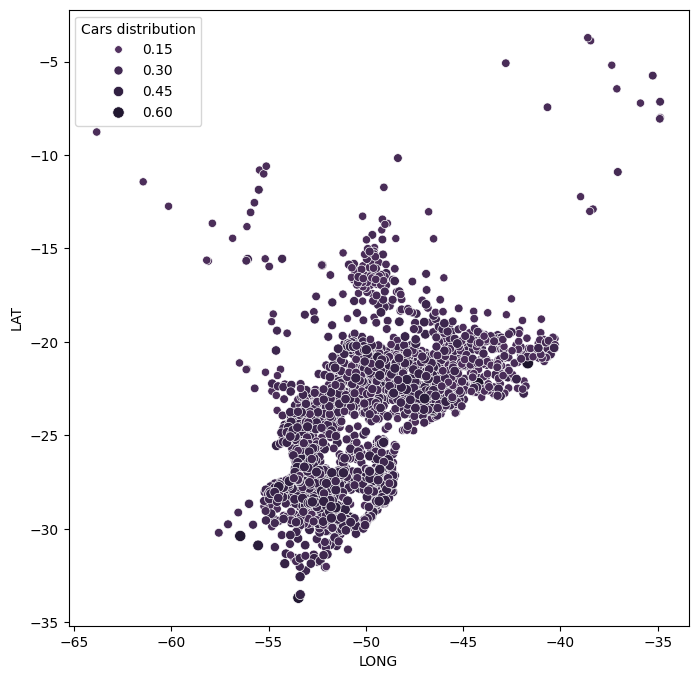

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=df[df['Cars distribution'] >= 0.20].LONG,
                y=df[df['Cars distribution'] >= 0.20].LAT,
                palette =cmap,
                hue=df['Cars distribution'],
                size=df['Cars distribution'])